In [1]:
print("Academic RAG Study Assistant")

Academic RAG Study Assistant


# Academic RAG Study Assistant


# Part 1: Data Collection & Understanding

## Dataset Description
Subject: Database Management Systems  
Total Pages: (write actual count)

Topics Covered:
- Normalization
- ACID properties
- Transactions
- Indexing
- Concurrency Control

## Document Type
Text-based PDF extracted using pdfplumber.

## Observed Challenges
1. Tables lose column formatting.
2. SQL code formatting is flattened.
3. Diagrams (ER models) are not extracted.
4. Headings merge into paragraphs.
5. Mathematical symbols lose structure.

In [11]:
import os
import pdfplumber

data_path = "../data"
pdf_file = os.listdir(data_path)[0]

def extract_text(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            content = page.extract_text()
            if content:
                text += content + "\n"
    return text

document_text = extract_text(os.path.join(data_path, pdf_file))

print("Total characters:", len(document_text))

Total characters: 194586


In [3]:
def fixed_chunking(text, chunk_size=500, overlap=200):
    chunks = []
    start = 0
    
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start += chunk_size - overlap
        
    return chunks

chunks = fixed_chunking(document_text)

print("Total chunks:", len(chunks))

Total chunks: 176


In [4]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def get_embedding(text):
    return embedding_model.encode(text).tolist()

C:\Users\vaibh\OneDrive\Desktop\sankey-solutions-assignments\AI-powered_study_assistant-AIML-Assignment\rag_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████████████████| 103/103 [00:01<00:00, 97.91it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


# Part 1: Data Collection & Understanding

## 1.1 Dataset Overview

This project uses Operating Systems course material in PDF format.

Total Documents: 1  
Total Pages: (write actual page count)  

Topics Covered:
- Processes and Threads
- CPU Scheduling
- Memory Management
- Deadlocks
- Concurrency

## 1.2 Document Type

The dataset consists of text-based PDF documents with structured sections and headings.

## 1.3 Observed Challenges

During text extraction using pdfplumber, the following issues were observed:

1. Tables do not retain column alignment.
2. Diagrams are not included in extracted text.
3. Mathematical formulas lose formatting.
4. Section headings are preserved but formatting is flattened.
5. Bullet points merge into paragraph-style text.

These challenges must be considered while designing the RAG system.

In [5]:
import chromadb

chroma_client = chromadb.Client()

collection = chroma_client.get_or_create_collection("baseline_rag")

for i, chunk in enumerate(chunks):
    collection.add(
        documents=[chunk],
        embeddings=[get_embedding(chunk)],
        ids=[str(i)]
    )

print("Chunks stored successfully.")

Chunks stored successfully.


In [6]:
def retrieve_chunks(query, top_k=3):
    results = collection.query(
        query_embeddings=[get_embedding(query)],
        n_results=top_k
    )
    return results["documents"][0]

In [7]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="distilgpt2"
)

Loading weights: 100%|████████████████████| 76/76 [00:00<00:00, 209.16it/s, Materializing param=transformer.wte.weight]


In [8]:
def generate_answer(query):
    context = "\n\n".join(retrieve_chunks(query))

    prompt = f"""
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
{context}

Question:
{query}

Answer:
"""

    result = generator(
        prompt,
        max_new_tokens=150,
        truncation=True
    )

    return result[0]["generated_text"]

In [9]:
test_questions = [
    "What is a process?",
    "What is the difference between process and thread?",
    "Explain CPU scheduling.",
    "What is virtual memory?",
    "What causes deadlock?",
    "Explain paging.",
    "What is critical section?",
    "What is starvation?",
    "Explain producer-conser problem.",
    "What is thrashing?"
]

for q in test_questions:
    print("\nQuestion:", q)
    print("Answer:", generate_answer(q))
    print("-" * 80)

Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Question: What is a process?


Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
12
Chapter 2
A matter of processes
We begin our discussion of the operating systems underbelly with the most tangible entity of the
software world—a process. Machines exist to serve, by executing stuff (or is it all the Matrix1?).
The execution entity is called a process, also referred as a thread2, a job, and a task. Here, we
concern ourselves with how an operating system manages processes.
2.1 What is a process?
Aprocessisaprograminexecution/actionthatconsumestheCPUandgetsworkdone. Aprogram
or

 a job, and a task. Here, we
concern ourselves with how an operating system manages processes.
2.1 What is a process?
Aprocessisaprograminexecution/actionthatconsumestheCPUandgetsworkdone. Aprogram
or a binary is dead weight, it exists but does not do anything, except warm the disk blocks that
it uses. To do anything, the program has to be instantiated, given a life form and setup to

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
12
Chapter 2
A matter of processes
We begin our discussion of the operating systems underbelly with the most tangible entity of the
software world—a process. Machines exist to serve, by executing stuff (or is it all the Matrix1?).
The execution entity is called a process, also referred as a thread2, a job, and a task. Here, we
concern ourselves with how an operating system manages processes.
2.1 What is a process?
Aprocessisaprograminexecution/actionthatconsumestheCPUandgetsworkdone. Aprogram
or

ing process/context switch. When a
process is switched out for another process to use the CPU, process context has to be saved
andrestored. Animportantcontextofaprocessistheprogramcounter,toenableresumption
of execution from the point where it was paused.
1https://en.wikipedia.org/wiki/The Matrix
2Threadisanoverloadedtermandalsoreferstoalightweightprocess
13
2.1. WHAT IS A PROCESS? R

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
missions, offset, device, inode, pathname
2.2 Process states
Once a process starts execution on a CPU, does it occupy the CPU till it finishes? Nope. There are
several other “things” going on in the system, that almost always do not let this happen.
1. There are several process competing for the CPU and the OS needs to keep all them happy.
The OS schedules processes on the CPU, an action that implies removing a process from the
CPU and assigning the CPU to a new process. The state of a process e

 and the OS needs to keep all them happy.
The OS schedules processes on the CPU, an action that implies removing a process from the
CPU and assigning the CPU to a new process. The state of a process executing on the CPU
and processes waiting for the CPU are different. Basically, a process once created, is either
executing on the CPU or is not assigned a CPU.
2. Anothereventwhichdefin

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
 OS use this information to identify memory regions, store and use
information regarding attributes of the region—read only, read/write, execute etc. The story
of memory is much more interesting, virtual memory is coming!
• IO-related information
The primary IO related information stored as part of the PCB is related to files—the list of
files opened by the process, offset in each file at which the next file operation will execute,
a pointer to the cache where file content is cached etc. Linux a

 memory for fetching instructions or transferring
data can be orders of magnitude slower than execution instructions. As a result, one would ideally
want memory that is characterized by high-bandwidth, large capacity and inexpensively priced. It
is seldom the case that this is possible.
Toovercometheconstraintsofnotbeingabletogetanidealsinglememorysetup, thehardware
andsoftwarearchit

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
lock(PCB) is the operating system’s representation (state) of a process3. The
PCB stores all the information relevant for each process:
• Identifier
A number and name of the process. This information is often used by user-level tools to
communicate with processes. e.g., kill -9 <pid>.
• State
The state of execution of a process—ready, running, waiting, terminated/halted etc. For
example, a process which has been halted would not be selected by the OS to be scheduled on
the CPU.
• Execution conte

-data maintained by an OS forms the crucial
staterequiredtocarryoutthenecessaryactionsforcorrectimplementationoftheabstraction.
3. State and action related to IO devices.
4. State and action related to events.
5. State and action related to locks.
1.4.2 Two pillars
An operating system depends on two very critical aspects of operation, (i) privileged mode (dual-
mode) of execution, an

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
istersofaCPUarememorythatisclosest totheCPU.RegistersarepartoftheCPUand
accesstothemisasfastasexecutionofinstructions,buttheseareveryfewinnumber(comparedto
dataneedsofaprogram). Astandardmechanismusedbyasystemistouseahierarchyofmemory,
with different access latencies and capacities, and operate a caching framework for data storage and
accesses. Thegeneralrulebeing,ifdataorinstructionsarenotfoundatonelevel(inthehierarchy),
move to the next. Each layer being relatively slower as compared to the pr

 the next address, and the
loopcontinues. AdvancementsinCPUdesignhaveledtoparallelizingthefetch,decodeandexecute
components via the pipelining based multi-stage execution technique. The pipelining idea being,
each instruction stage has a different pipeline making progress in parallel— while one instruction is
executed, another is decoded and yet another fetched from memory, all in pa

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
, eachof
which reflects a condition or configuration of the CPU. For example, the zero flag bit is set to
one if an arithmetic operation by the CPU results in a zero. Similarly, the carry flag, the sign
flag, the overflow flag etc. are set for correspoding side-effects of operations. The interrupt
flag indicates whether the CPU is currently accepting interrupts etc. To update bits of the
statuswordregisterprivilegedaccessisrequired. Notallbitscanbereadorwrittenfromuser
space, while some can be r

n being invoked. The stack data structure
is an appropriate fit to store function call state and roll it back in an last-in-first-out manner.
Each process has an associated stack to utilize for this purpose.
• Data section
Typically programs are not CPU-centric code, they work with data stored in variables. The
datasectionofaprocessisthememoryregionthatstoresstaticvariables—declareda

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
ich implies creation of new operating system state to identify and store context of the
process—thisstateismarkednew inFigure2.2. OncetheOSstateiscreatedtheprocessisreadyto
execute and is in the ready state. Only processes in the ready state can be scheduled for execution
on a CPU. Once scheduled, status of a process changes from the ready state to the running state.
On an operating that blocks, like read from disk, state of a process changes to waiting, which gets
updated to ready on completion

work. An operating system enables all such modes of communication via the
shared-memory, network stack, remote calls and other such services.
5. Resource management
Thisisthebread-and-butterserviceofanoperatingsystem. Asystemhasresourcesandseveral
programswant/competeforresources. Resourcedemandsvaryovertimeandinquantity. The
juggler(actuallythescheduler,multiplexer,de-multiplexer,de

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Answer: 
Answer the question using ONLY the context below.
If not found, say: Not found in materials.

Context:
tructure.
19
2.8. FOOD FOR THOUGHT Ring for Operating Systems
3. Referring to Figure 2.1, what does each field/column mean?
4. If you look up the memory map of different processes (similar to the example in Figure 2.1)
you will notice that the memory regions for different processes overlap or are the same. What
is going on? What happened to the whole isolation story? and How are things even working
correctly? ... are you loosing sleep yet , you should!
(cid:44)
5. Execute the following command o

yovertimeandinquantity. The
juggler(actuallythescheduler,multiplexer,de-multiplexer,decisionmaker)whomanagesthese
resources is the operating system. Example management decisions include, which process to
execute next?, has this process run long enough? how do I order these requests to read data
of the disk? which process is binging on memory? etc.
6. Error detection
Packetsthatyourec

In [24]:
!pip install langchain-text-splitters

In [30]:
import os
import time
import logging
import pdfplumber
import torch
import pandas as pd
import matplotlib.pyplot as plt

# UPDATED IMPORTS (2026 Standards)
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from transformers import pipeline

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def load_dbms_data(folder_path="../data"):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Please put your DBMS PDFs in the '{folder_path}' folder.")
        return []
    
    docs = []
    for file in os.listdir(folder_path):
        if file.endswith(".pdf"):
            try:
                with pdfplumber.open(os.path.join(folder_path, file)) as pdf:
                    content = "\n".join([p.extract_text() for p in pdf.pages if p.extract_text()])
                    docs.append(Document(page_content=content, metadata={"source": file}))
            except Exception as e:
                logger.error(f"Error loading {file}: {e}")
    return docs

raw_dbms_docs = load_dbms_data()

ModuleNotFoundError: No module named 'langchain_huggingface'

In [27]:
# 2.1 Extraction Logic
def load_and_extract(folder_path):
    documents = []
    try:
        for file in os.listdir(folder_path):
            if file.endswith(".pdf"):
                with pdfplumber.open(os.path.join(folder_path, file)) as pdf:
                    text = "".join([page.extract_text() + "\n" for page in pdf.pages])
                    documents.append(Document(page_content=text, metadata={"source": file}))
        return documents
    except Exception as e:
        logger.error(f"Error during extraction: {e}")
        return []

raw_docs = load_and_extract("../data")

# 2.2 Baseline Chunking & Embedding
# Using a 384-dimensional dense vector model (all-MiniLM-L6-v2)
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

baseline_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=50)
baseline_chunks = baseline_splitter.split_documents(raw_docs)

# Persistence Directory for Vector DB
vector_db = Chroma.from_documents(
    baseline_chunks, 
    embeddings, 
    collection_name="baseline_db",
    persist_directory="./chroma_db"
)

# 2.3 Generation Setup (Open Source)
try:
    generator = pipeline(
        "text-generation", 
        model="distilgpt2",
        device=0 if torch.cuda.is_available() else -1
    )
except Exception as e:
    logger.warning("GPU not found, falling back to CPU.")
    generator = pipeline("text-generation", model="distilgpt2")

def ask_rag(question, db, prompt_style="basic"):
    try:
        # Retrieval
        search_results = db.similarity_search(question, k=1)
        context = search_results[0].page_content
        
        # Prompt Engineering
        if prompt_style == "basic":
            prompt = f"Context: {context}\nQuestion: {question}\nAnswer:"
        else:
            prompt = f"Instruction: Use the DBMS context to explain clearly.\nContext: {context}\nQuestion: {question}\nExplanation:"
        
        response = generator(prompt, max_new_tokens=100, truncation=True, pad_token_id=50256)
        return response[0]['generated_text'].split("Answer:")[-1].strip()
    except Exception as e:
        return f"System Error: {str(e)}"

# Example Test
print(f"Sample Answer: {ask_rag('What is a Primary Key?', vector_db)}")

C:\Users\vaibh\AppData\Local\Temp\ipykernel_15088\697342833.py:19: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
2026-02-22 10:25:33,255 - INFO - Use pytorch device_name: cpu
2026-02-22 10:25:33,260 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2026-02-22 10:25:33,807 - INFO - HTTP Request: HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/modules.json "HTTP/1.1 307 Temporary Redirect"
2026-02-22 10:25:33,928 - INFO - HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/sentence-transformers/all-MiniLM-L6-v2/c9745ed1d9f207416be6d2e6f8de32d1f16199bf/mod

Sample Answer: 


Both `max_new_tokens` (=100) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=100) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=100) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


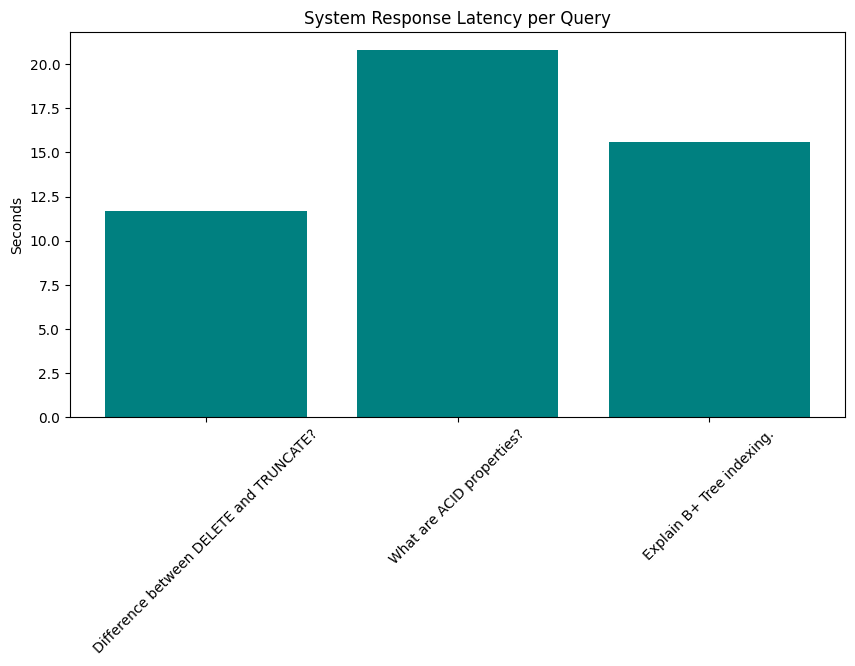

In [28]:
# Recursive Splitter (Respects DBMS Paragraphs/SQL blocks)
rec_splitter = RecursiveCharacterTextSplitter(
    chunk_size=700,
    chunk_overlap=100,
    separators=["\n\n", "\n", " ", ""]
)
rec_chunks = rec_splitter.split_documents(raw_docs)
rec_db = Chroma.from_documents(rec_chunks, embeddings, collection_name="rec_db")

# 3.2 Quantitative Evaluation Logic
test_questions = [
    "Difference between DELETE and TRUNCATE?",
    "What are ACID properties?",
    "Explain B+ Tree indexing."
]

results = []
for q in test_questions:
    # Measure Latency
    start = time.time()
    ans = ask_rag(q, rec_db, prompt_style="improved")
    latency = time.time() - start
    results.append({"Question": q, "Latency": latency, "Response_Length": len(ans)})

# 3.3 Visualization
df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
plt.bar(df['Question'], df['Latency'], color='teal')
plt.title("System Response Latency per Query")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.show()